# Importing Packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


# Defining paths

In [2]:
path='../input/my-nsfw-dataset/train/train/'

In [3]:
Nude=os.listdir(path+'NSFW/')
Decent=os.listdir(path+'SFW/')
test_path='../input/my-nsfw-dataset/test/test/'
test=os.listdir(test_path)

# Importing VGG-16 Pretrained model

In [4]:
vgg16 = tf.keras.applications.VGG16(include_top=False)
preprocess_input = tf.keras.applications.vgg16.preprocess_input
image = tf.keras.preprocessing.image

58892288/58889256 [==============================] - 2s 0us/step


In [5]:
batch_size=20

# Extracting Features

In [6]:
def extract_features(img_paths, batch_size=batch_size):

    global vgg16
    n = len(img_paths)
    img_array = np.zeros((n, 299, 299, 3))
    
    for i, path in enumerate(img_paths):
        img = image.load_img(path, target_size=(299, 299))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        x = preprocess_input(img)
        img_array[i] = x
    
    X = vgg16.predict(img_array, batch_size=batch_size, verbose=1)
    X = X.reshape(n, 512, -1)
    return X


In [7]:
X = extract_features(
    list(map(lambda x: path + 'NSFW/' + x, Nude)) + list(map(lambda x: path + 'SFW/' + x, Decent))
) 
y = np.array([1] * len(Nude) + [0] * len(Decent))

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2858: DecompressionBombWarning: Image size (147659204 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


74/74 [==============================] - 19s 130ms/step


In [43]:
X_test = extract_features(
    list(map(lambda x: test_path + x, test))
)
y_test = np.array([1] * len(Nude) + [0] * len(Decent))

10/10 [==============================] - 1s 104ms/step


# Training the model

In [44]:
def train():
    model = tf.keras.models.Sequential([ 
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1724, activation=tf.nn.relu),


      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)

    ])
    return model

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Dense
np.random.seed(42)

epochs = 10

model = train()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test,y_test),
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/10
59/59 [==============================] - 1s 14ms/step - loss: 28.2003 - accuracy: 0.8231 - val_loss: 6.8155 - val_accuracy: 0.9106
Epoch 2/10
59/59 [==============================] - 1s 12ms/step - loss: 1.6513 - accuracy: 0.9660 - val_loss: 7.5973 - val_accuracy: 0.9187
Epoch 3/10
59/59 [==============================] - 1s 13ms/step - loss: 0.1976 - accuracy: 0.9902 - val_loss: 7.0588 - val_accuracy: 0.9214
Epoch 4/10
59/59 [==============================] - 1s 11ms/step - loss: 0.2412 - accuracy: 0.9953 - val_loss: 8.4613 - val_accuracy: 0.9160
Epoch 5/10
59/59 [==============================] - 1s 11ms/step - loss: 0.4558 - accuracy: 0.9924 - val_loss: 7.2064 - val_accuracy: 0.9295
Epoch 6/10
59/59 [==============================] - 1s 11ms/step - loss: 0.2368 - accuracy: 0.9924 - val_loss: 7.8561 - val_accuracy: 0.9404
Epoch 7/10
59/59 [==============================] - 1s 11ms/step - loss: 0.1921 - accuracy: 0.9955 - val_loss: 8.5615 - val_accuracy: 0.9322
Epoch 8/10
5

# Training and Loss Graph

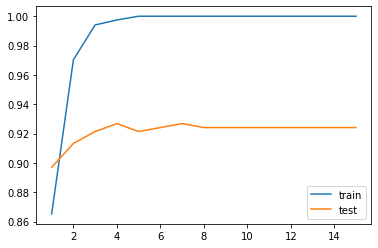

In [13]:
plt.plot(range(1,epochs+1), history.history['accuracy'], label='train')
plt.plot(range(1,epochs+1), history.history['val_accuracy'], label='test')
plt.legend()

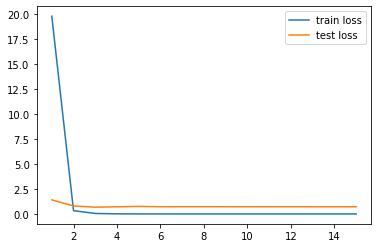

In [14]:
plt.plot(range(1,epochs+1), history.history['loss'], label='train loss')
plt.plot(range(1,epochs+1), history.history['val_loss'], label='test loss')
plt.legend()

# Prediction

In [48]:
import cv2

# Detecting Nude image

In [49]:
X_test = extract_features(
    list(map(lambda x: '../input/my-nsfw-dataset/test/test/NSFW (2).jpg' , test))
)

10/10 [==============================] - 1s 102ms/step


In [50]:
y_pred = model.predict(X_test)
if(y_pred>0.5).all():
    print("This image is not safe to use and it depicts Nudity")
elif(y_pred<0.5).all():
    print("Safe to use")
else:
    print("Invalid Image")

This image is not safe to use and it depicts Nudity


**Our model has detected it accurately as Nudity. The image can't be displayed here as it is a sensual content**

# Safe Image

**These are the safe images that we use for testing**

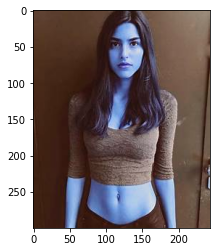

In [51]:
plt.imshow(cv2.imread('../input/safeee/s1.jpg'))

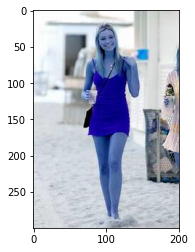

In [52]:
plt.imshow(cv2.imread('../input/safeee/s2.jpg'))

In [53]:
X_test = extract_features(
    list(map(lambda x: '../input/safeee/s1.jpg' , test))
)

10/10 [==============================] - 1s 102ms/step


In [54]:
y_pred = model.predict(X_test)
if(y_pred>0.5).all():
    print("This image is not safe to use and it depicts Nudity")
elif(y_pred<0.5).all():
    print("Safe to use")
else:
    print("Invalid Image")

Safe to use


In [55]:
X_test = extract_features(
    list(map(lambda x: '../input/safeee/s2.jpg' , test))
)

10/10 [==============================] - 1s 102ms/step


In [56]:
y_pred = model.predict(X_test)
if(y_pred>0.5).all():
    print("This image is not safe to use and it depicts Nudity")
elif(y_pred<0.5).all():
    print("Safe to use")
else:
    print("Invalid Image")

Safe to use


**Model tells that the above two images are safe images which is precise.**

# Overall our model predicts accurately with an accuracy of around 93%